**Import Libraries**

In [53]:
import os
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

**Load raw data from files**

In [54]:
# infected = os.listdir('cell_images/cell_images/Parasitized')
# uninfected = os.listdir('cell_images/cell_images/Uninfected')
infected = os.listdir('/Users/wyattyoung/Downloads/cell_images/cell_images/Parasitized')
uninfected = os.listdir('/Users/wyattyoung/Downloads/cell_images/cell_images/Uninfected')

**Data Exploration**

In [55]:
# look at image dimensions of each png
def get_images_dimensions(images_list, base_dir):
    dimensions = {'widths': [], 'heights': []}
    for image_name in images_list:
        if not image_name.lower().endswith('.png'):
            print("Ruh Roh Raggy")
        # full path to the image
        image_path = os.path.join(base_dir, image_name)
        # read in color
        image = cv2.imread(image_path)
        if image is not None:
            h, w, _ = image.shape  # color image has (height, width, channels)
            dimensions['widths'].append(w)
            dimensions['heights'].append(h)
        else:
            print(f"Warning: Skipping {image_path}, couldn't load.")
    return dimensions

Ruh Roh Raggy
Ruh Roh Raggy


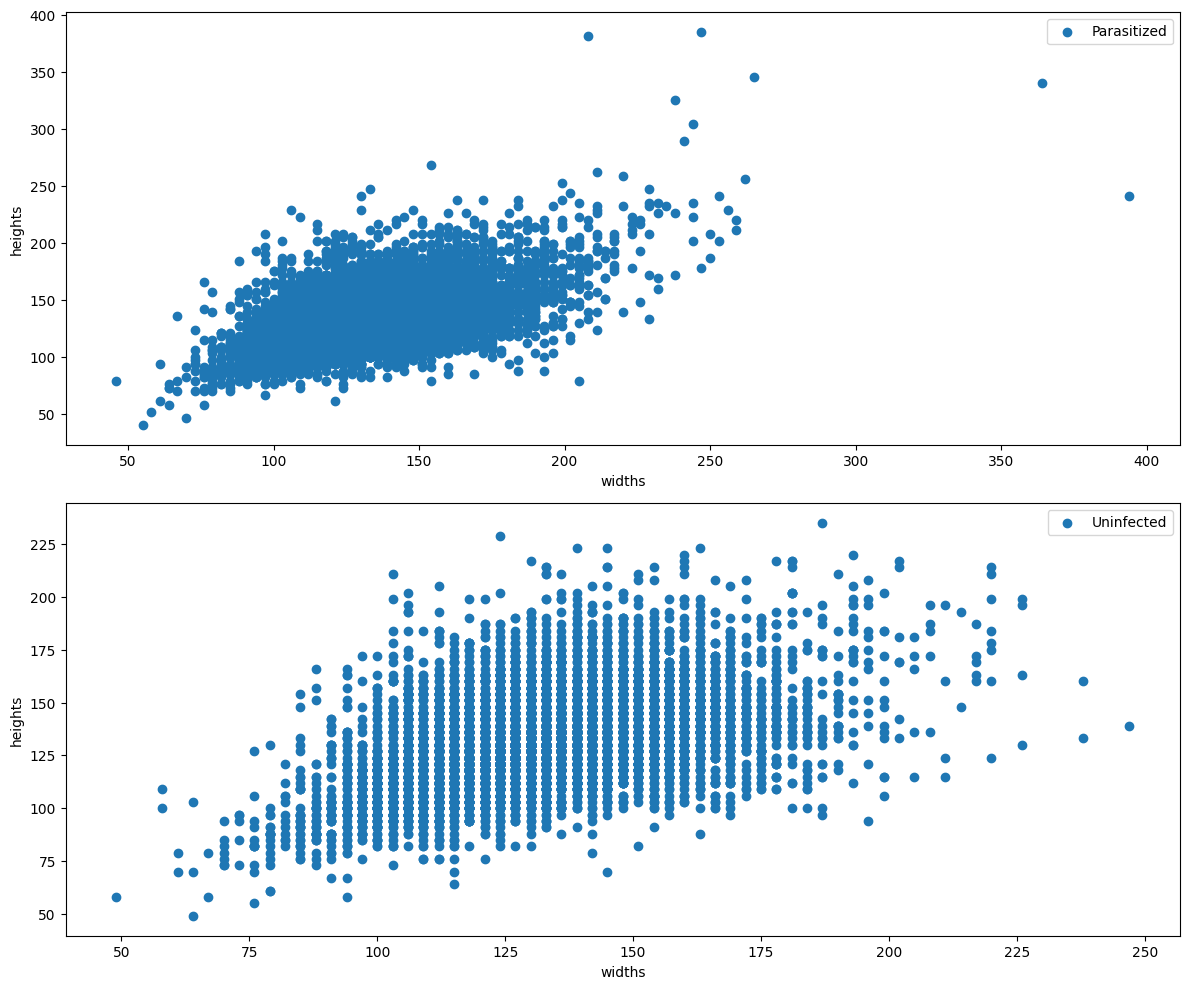

In [56]:
import matplotlib.pyplot as plt
infected_dims = get_images_dimensions(infected, '/Users/wyattyoung/Downloads/cell_images/cell_images/Parasitized')
uninfected_dims = get_images_dimensions(uninfected, '/Users/wyattyoung/Downloads/cell_images/cell_images/Uninfected')
fig, axs = plt.subplots(nrows=2, figsize=(12,10))
axs[0].scatter(infected_dims['widths'], infected_dims['heights'], label="Parasitized")
axs[0].set_xlabel('widths')
axs[0].set_ylabel('heights')
axs[0].legend()
axs[1].scatter(uninfected_dims['widths'], uninfected_dims['heights'], label="Uninfected")
axs[1].set_xlabel('widths')
axs[1].set_ylabel('heights')
axs[1].legend()
plt.tight_layout()

**Create a dataset of labelled greyscale (50x50) images from raw data**

In [57]:
#initialize lists to hold image data 
data_bw = []
labels_bw = []
#load infected images
for i in infected:
    try:
        path = os.path.join('cell_images/cell_images/Parasitized', i)
        #load image as a greyscale array
        image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        #normalize image
        if image is not None:
            resized = cv2.resize(image, (50, 50))
            normalized = resized / 255.0
            data_bw.append(normalized)
            #label 'infected' as 1
            labels_bw.append(1)
    except Exception as e:
        print(f'Skipping {i}: {e}')
#load uninfected images
for u in uninfected:
    try:
        path = os.path.join('cell_images/cell_images/Uninfected', u)
        image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if image is not None:
            resized = cv2.resize(image, (50, 50))
            normalized = resized / 255.0
            data_bw.append(normalized)
            #label 'uninfected' as 0
            labels_bw.append(0)
    except Exception as e:
        print(f'Skipping {u}: {e}')

In [58]:
data_bw[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**Create a dataset of labelled colored (128,128) images from raw data**

In [60]:
#initialize lists to hold image data 
data_color = []
labels_color = []
#load infected images
for i in infected:
    try:
        path = os.path.join('cell_images/cell_images/Parasitized', i)
        #load image as a rbg color array
        image = cv2.imread(path)
        #normalize image
        if image is not None:
            resized = cv2.resize(image, (128, 128))
            normalized = resized / 255.0
            data_color.append(normalized)
            #label 'infected' as 1
            labels_color.append(1)
    except Exception as e:
        print(f'Skipping {i}: {e}')
#load uninfected images
for u in uninfected:
    try:
        path = os.path.join('cell_images/cell_images/Uninfected', u)
        image = cv2.imread(path)
        if image is not None:
            resized = cv2.resize(image, (128, 128))
            normalized = resized / 255.0
            data_color.append(normalized)
            #label 'uninfected' as 0
            labels_color.append(0)
    except Exception as e:
        print(f'Skipping {u}: {e}')

**Split dataset into cell image data (X) and labels (y)**

In [61]:
# GREYSCALE
# image data: each entry is a pixel's intensity value
X_bw = np.array(data_bw)
#label data: each entry is either 1 (infected) or 0 (uninfected)
y_bw = np.array(labels_bw)
#save the split data for faster loading later
np.save('Cells_bw.npy', X_bw)
np.save('Labels_bw.npy', y_bw)
#visualize split data's shape to ensure there are equal numbers of entries in the cell data and labels arrays
print('Cells : {} | labels : {}'.format(X_bw.shape , y_bw.shape))

Cells : (27558, 50, 50) | labels : (27558,)


In [62]:
# COLOR (CNN)
# image data: each entry is a pixel's intensity value
X_color = np.array(data_color)
#label data: each entry is either 1 (infected) or 0 (uninfected)
y_color = np.array(labels_color)
#save the split data for faster loading later
np.save('Cells_color.npy', X_color)
np.save('Labels_color.npy', y_color)
#visualize split data's shape to ensure there are equal numbers of entries in the cell data and labels arrays
print('Cells : {} | labels : {}'.format(X_color.shape , y_color.shape))

Cells : (27558, 128, 128, 3) | labels : (27558,)


**Visualize Data**

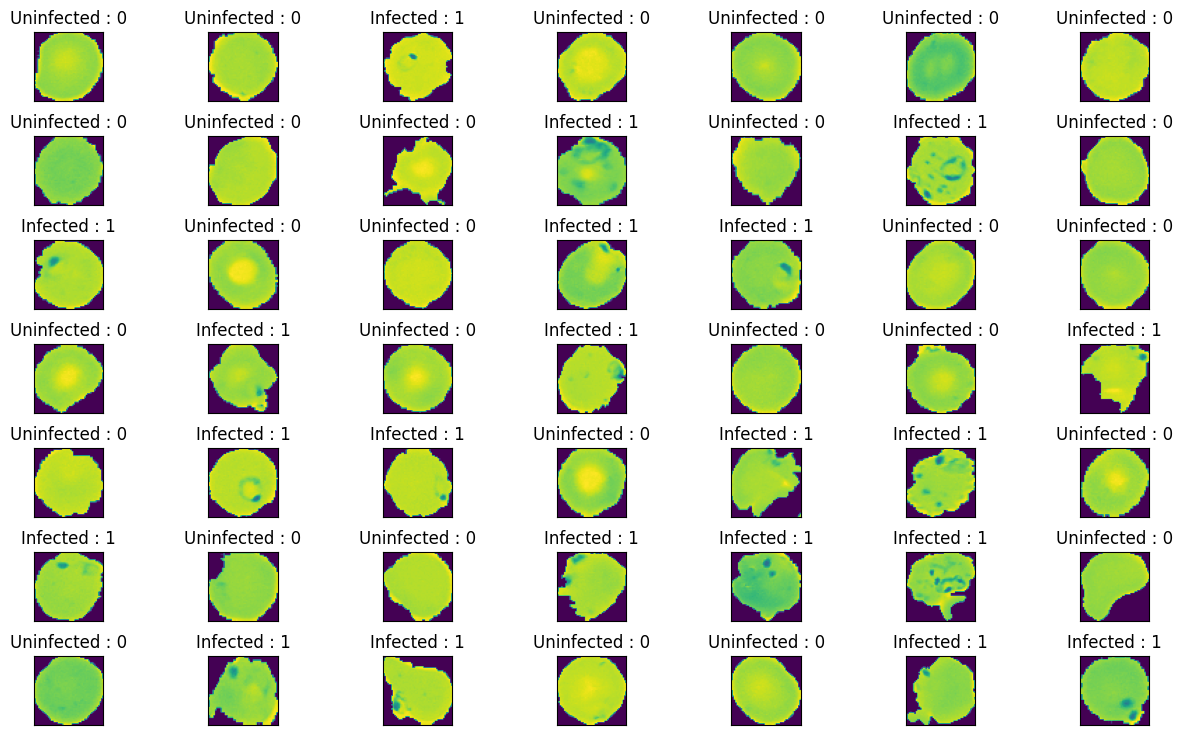

In [63]:
#plot a random subset of our pre-processed cell images with their labels
plt.figure(1 , figsize = (15 , 9))
n = 0 
for i in range(49):
    n += 1 
    r = np.random.randint(0 , X.shape[0] , 1)
    plt.subplot(7 , 7 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(X[r[0]])
    plt.title('{} : {}'.format('Infected' if y[r[0]] == 1 else 'Uninfected' , y[r[0]]) )
    plt.xticks([]) , plt.yticks([])
    
plt.show()

**Flatten data and prepare for model training(train test split)**

In [64]:
#GREYSCALE
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
# flatten each image from 50x50 to 2500
print(X_bw.shape)
Xbw_flat = X_bw.reshape(X_bw.shape[0], -1)
print(Xbw_flat.shape)
# train test split
X_train_bw, X_val_bw, y_train_bw, y_val_bw = train_test_split(Xbw_flat, y_bw, test_size=0.15, random_state=42)

(27558, 50, 50)
(27558, 2500)


In [65]:
#COLOR does not need to be flattened remain in 4D; (batch, h, w, (rgb)) for CNN
print(X_color.shape)
# train test split
X_train_color, X_val_color, y_train_color, y_val_color = train_test_split(X_color, y_color, test_size=0.15, random_state=42)

(27558, 128, 128, 3)


**Random Forest Classifier**

In [66]:
from sklearn.ensemble import RandomForestClassifier
import time
rfc_dictlist = []
# performance with no parameter tuning and time for training
start = time.time()
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_train_bw, y_train_bw)
end = time.time()
rfc_ypred = rfc.predict(X_val_bw)
rfc_acc = rfc.score(X_val_bw, y_val_bw)
rfc_f1 = f1_score(y_val_bw, rfc_ypred)
print(f"Initial Random Forest Accuracy: {rfc_acc} and F1: {rfc_f1}")
# store list for rfc
rfc_dictlist.extend([rfc_acc, rfc_f1, end - start])

Initial Random Forest Accuracy: 0.8113207547169812 and F1: 0.8180121325244983


In [67]:
# from sklearn.model_selection import GridSearchCV
# # performance after proper grid search-hyperparam tuning
# param_grid_rfc = {
#     'n_estimators': [300, 400, 500],
#     'max_depth': [100, 125, 150],
#     'min_samples_split': [5],
#     'min_samples_leaf': [1],
#     'max_features': ['log2']
# }

# grid_search_rfc = GridSearchCV(
#     RandomForestClassifier(random_state=42),
#     param_grid_rfc,
#     cv=3,
#     scoring='f1',
#     n_jobs=-1, 
#     verbose=2
# )
# grid_search_rfc.fit(X_train_bw, y_train_bw)
# print(f"Best Params: {grid_search_rfc.best_params_}")

Tuned Random Forest Accuracy: 0.810836961780358 and F1: 0.8190652475705692


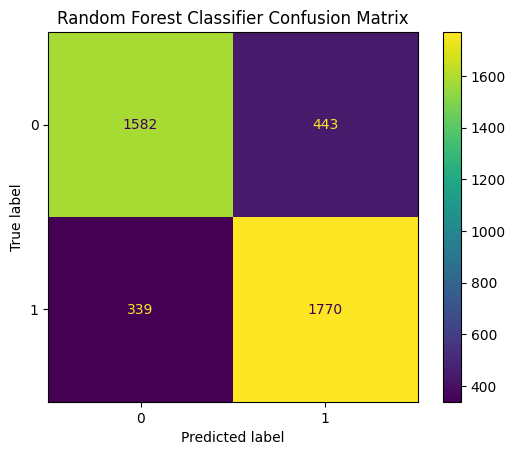

In [68]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
# best_rfc_params = grid_search_rfc.best_params_
start_tuned = time.time()
rfc_tuned = RandomForestClassifier(n_estimators=500, max_depth=100, min_samples_split=5, min_samples_leaf=1, max_features='log2', random_state=42)
rfc_tuned.fit(X_train_bw, y_train_bw)
end_tuned = time.time()
rfc_tuned_ypred = rfc_tuned.predict(X_val_bw)
rfc_tuned_acc = rfc_tuned.score(X_val_bw, y_val_bw)
rfc_tuned_f1 = f1_score(y_val_bw, rfc_tuned_ypred)
print(f"Tuned Random Forest Accuracy: {rfc_tuned_acc} and F1: {rfc_tuned_f1}")
rfc_dictlist.extend([rfc_tuned_acc, rfc_tuned_f1, end_tuned - start_tuned])
# confusion matrix
rfc_cm = confusion_matrix(y_val_bw, rfc_tuned_ypred)
ConfusionMatrixDisplay(confusion_matrix=rfc_cm).plot()
plt.title("Random Forest Classifier Confusion Matrix")
plt.show()

**Logistic Regression**

In [69]:
from sklearn.linear_model import LogisticRegression
lr_dictlist = []
# initial LR performance
start = time.time()
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_bw, y_train_bw)
end = time.time()
lr_ypred = lr.predict(X_val_bw)
lr_acc = lr.score(X_val_bw, y_val_bw)
lr_f1 = f1_score(y_val_bw, lr_ypred)
print(f"Initial Logistic Regression Accuracy: {lr_acc} and F1: {lr_f1}")
# store initial
lr_dictlist.extend([lr_acc, lr_f1, end - start])

Initial Logistic Regression Accuracy: 0.6422351233671988 and F1: 0.6400584083718667


In [70]:
# from sklearn.model_selection import GridSearchCV
# # lr performance after param tuning
# param_grid_lr = {
#     'C': [0.01, 0.1, 1, 10], # regularization str
#     'solver': ['liblinear', 'saga'],
#     'penalty': ['l1', 'l2']
# }
# grid_search_lr = GridSearchCV(
#     LogisticRegression(max_iter=1000, random_state=42),
#     param_grid_lr,
#     cv=3,
#     scoring='f1',
#     n_jobs=-1,
#     verbose=2
# )
# grid_search_lr.fit(X_train_bw, y_train_bw)
# print(f"Best Params for LR: {grid_search_lr.best_params_}")

Tuned LR Accuracy: 0.6591678761490082 and F1: 0.6589203582667635


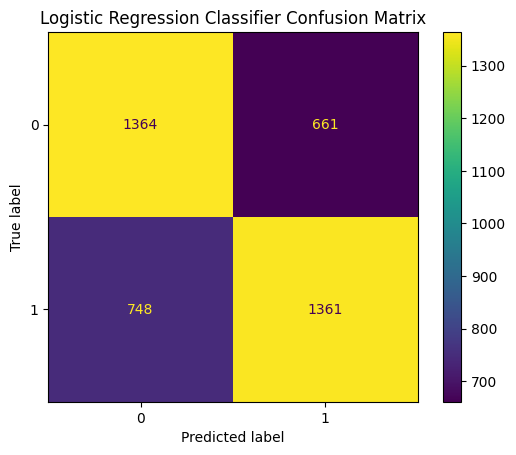

In [71]:
# build tuned logistic regression
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
# best_lr_params = grid_search_lr.best_params_
start_tuned = time.time()
lr_tuned = LogisticRegression(C=0.01, solver='saga', penalty='l2', max_iter=1000, random_state=42)
lr_tuned.fit(X_train_bw, y_train_bw)
end_tuned = time.time()
lr_tuned_ypred = lr_tuned.predict(X_val_bw)
lr_tuned_acc = lr_tuned.score(X_val_bw, y_val_bw)
lr_tuned_f1 = f1_score(y_val_bw, lr_tuned_ypred)
print(f"Tuned LR Accuracy: {lr_tuned_acc} and F1: {lr_tuned_f1}")
# store tuned
lr_dictlist.extend([lr_tuned_acc, lr_tuned_f1, end_tuned - start_tuned])
# confusion matrix
lr_cm = confusion_matrix(y_val_bw, lr_tuned_ypred)
ConfusionMatrixDisplay(confusion_matrix=lr_cm).plot()
plt.title("Logistic Regression Classifier Confusion Matrix")
plt.show()

**Support Vector Machine**

In [72]:
from sklearn.svm import SVC
svm_dictlist = []
# untuned SVM performance with radial basis function(gaussian) - assuming nonlinear data separation
start = time.time()
svm = SVC(kernel='rbf', random_state=42) 
svm.fit(X_train_bw, y_train_bw)
end = time.time()

svm_ypred = svm.predict(X_val_bw)
svm_acc = svm.score(X_val_bw, y_val_bw)
svm_f1 = f1_score(y_val_bw, svm_ypred)
print(f"Initial SVM Accuracy: {svm_acc} and F1: {svm_f1}")

# store initial
svm_dictlist.extend([svm_acc, svm_f1, end - start])

Initial SVM Accuracy: 0.7119013062409288 and F1: 0.7191700070738033


In [73]:
# # grid search hyperparameter tuning for SVM
# param_grid_svm = {
#     'C': [5, 10],
#     'gamma': ['scale', 0.1],
#     'kernel': ['rbf']
# }
# grid_search_svm = GridSearchCV(
#     SVC(random_state=42),
#     param_grid_svm,
#     cv=3,
#     scoring='f1',
#     n_jobs=-1,
#     verbose=2
# )
# grid_search_svm.fit(X_train_bw, y_train_bw)
# print(f"Best Params for SVM: {grid_search_svm.best_params_}")

In [74]:
# tuned SVM performance
# Best Params for SVM: {'C': 5, 'gamma': 0.1, 'kernel': 'rbf'}
# best_svm_params = grid_search_svm.best_params_
start_tuned = time.time()
svm_tuned = SVC(
    C=5,
    gamma=0.1,
    kernel='rbf',
    random_state=42
)
svm_tuned.fit(X_train_bw, y_train_bw)
end_tuned = time.time()

svm_tuned_ypred = svm_tuned.predict(X_val_bw)
svm_tuned_acc = svm_tuned.score(X_val_bw, y_val_bw)
svm_tuned_f1 = f1_score(y_val_bw, svm_tuned_ypred)
print(f"Tuned SVM Accuracy: {svm_tuned_acc} and F1: {svm_tuned_f1}")

svm_dictlist.extend([svm_tuned_acc, svm_tuned_f1, end_tuned - start_tuned])

Tuned SVM Accuracy: 0.6724721819061442 and F1: 0.7281124497991968


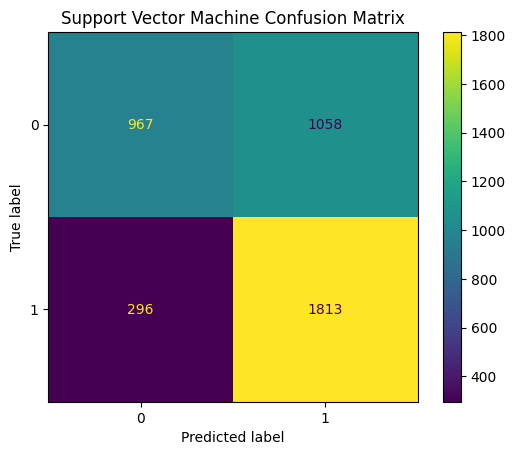

In [75]:
# confusion matrix
svm_cm = confusion_matrix(y_val_bw, svm_tuned_ypred)
ConfusionMatrixDisplay(confusion_matrix=svm_cm).plot()
plt.title("Support Vector Machine Confusion Matrix")
plt.show()

**Convolutional Neural Network**

In [76]:
import tensorflow as tf
from tensorflow.keras import layers, models
import time
import numpy as np
from sklearn.metrics import f1_score

cnn_dictlist = []

# CNN model for colored images
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=X_train_color.shape[1:]), # detects features like shapes
    layers.MaxPooling2D((2, 2)),                                                       # reucing data to prevent overfitting
    layers.Conv2D(64, (3, 3), activation='relu'),                                      
    layers.MaxPooling2D((2, 2)),                                                       
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),                                                                  # convert to 1D vector
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')                                              # infected vs not infected
])

cnn_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Initial training
start = time.time()
cnn_model.fit(X_train_color, y_train_color, epochs=5, batch_size=32, verbose=0)  # adjust epochs/batch_size if needed
end = time.time()

# Evaluate on validation set
cnn_probs = cnn_model.predict(X_val_color).flatten()
cnn_preds = (cnn_probs > 0.5).astype(int)
cnn_acc = np.mean(cnn_preds == y_val_color)
cnn_f1 = f1_score(y_val_color, cnn_preds)

print(f"Initial CNN Accuracy: {cnn_acc} and F1: {cnn_f1}")
cnn_dictlist.extend([cnn_acc, cnn_f1, end - start])

# Tuned training 
start_tuned = time.time()
cnn_model_tuned = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=X_train_color.shape[1:]),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

cnn_model_tuned.compile(optimizer='adam',
                        loss='binary_crossentropy',
                        metrics=['accuracy'])

cnn_model_tuned.fit(X_train_color, y_train_color, epochs=5, batch_size=32, verbose=0)
end_tuned = time.time()

# evaluation
tuned_probs = cnn_model_tuned.predict(X_val_color).flatten()
tuned_preds = (tuned_probs > 0.5).astype(int)
tuned_acc = np.mean(tuned_preds == y_val_color)
tuned_f1 = f1_score(y_val_color, tuned_preds)
print(f"Tuned CNN Accuracy: {tuned_acc} and F1: {tuned_f1}")
cnn_dictlist.extend([tuned_acc, tuned_f1, end_tuned - start_tuned])

/Users/wyattyoung/PycharmProjects/NERVES/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/wyattyoung/PycharmProjects/NERVES/.venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


130/130 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step
Initial CNN Accuracy: 0.9596032897919691 and F1: 0.9600191525017956


/Users/wyattyoung/PycharmProjects/NERVES/.venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


130/130 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step
Tuned CNN Accuracy: 0.9583938074504113 and F1: 0.9588516746411483


**Build Evaluation table/df**

In [80]:
import pandas as pd
models = ["Random Forest Classifier", "Logistic Regression", "Support Vector Machine", "Convolutional Neural Network"]
model_eval_dict = {model: [] for model in models}
model_eval_dict["Convolutional Neural Network"] = cnn_dictlist
model_eval_dict["Random Forest Classifier"] = rfc_dictlist
model_eval_dict["Logistic Regression"] = lr_dictlist
model_eval_dict["Support Vector Machine"] = svm_dictlist
eval_df = pd.DataFrame.from_dict(model_eval_dict, orient='index')
eval_df.columns = ["Initial Accuracy", "Initial F1", "Initial Training Time (s)", "Tuned Accuracy", "Tuned F1", "Tuned Training Time (s)"]
eval_df

,Initial Accuracy,Initial F1,Initial Training Time (s),Tuned Accuracy,Tuned F1,Tuned Training Time (s)
Random Forest Classifier,0.811321,0.818012,59.327895,0.810837,0.819065,60.111020
Logistic Regression,0.642235,0.640058,21.691136,0.659168,0.658920,37.357107
Support Vector Machine,0.711901,0.719170,364.061875,0.672472,0.728112,1845.886452
Convolutional Neural Network,0.959603,0.960019,379.355709,0.958394,0.958852,1474.168028
